In [ ]:
import pandas as pd
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test_0qrQsBZ.csv to Test_0qrQsBZ (1).csv
Saving Train_SU63ISt.csv to Train_SU63ISt (1).csv


In [ ]:
import io
train_original= pd.read_csv(io.BytesIO(uploaded['Train_SU63ISt (1).csv']),encoding='cp1252')

In [ ]:
import io
test_original= pd.read_csv(io.BytesIO(uploaded['Test_0qrQsBZ (1).csv']),encoding='cp1252')

In [ ]:
train=train_original.copy()
test=test_original.copy()

In [ ]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [ ]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [ ]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [ ]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [ ]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour
    i['dayofweek']=i.Datetime.dt.dayofweek

In [ ]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

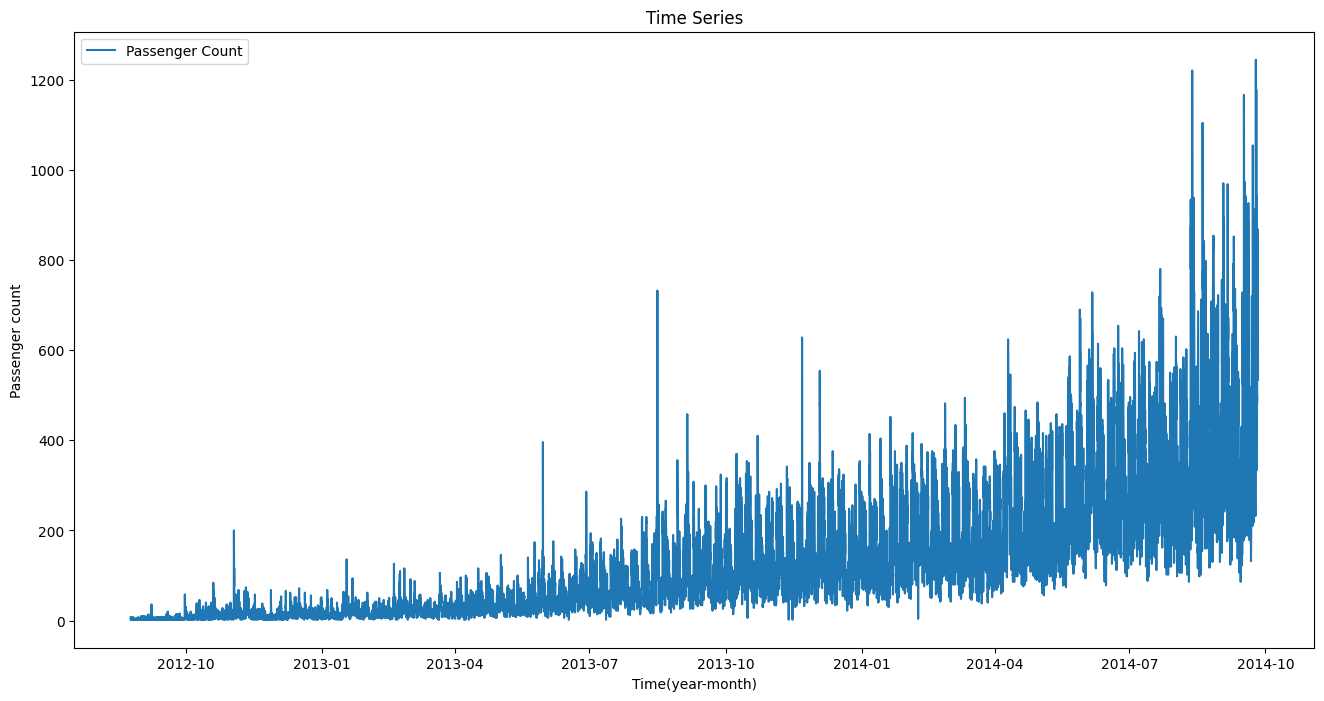

In [ ]:
train.index = train['Datetime']
df=train.drop('ID',1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

<Axes: xlabel='year'>

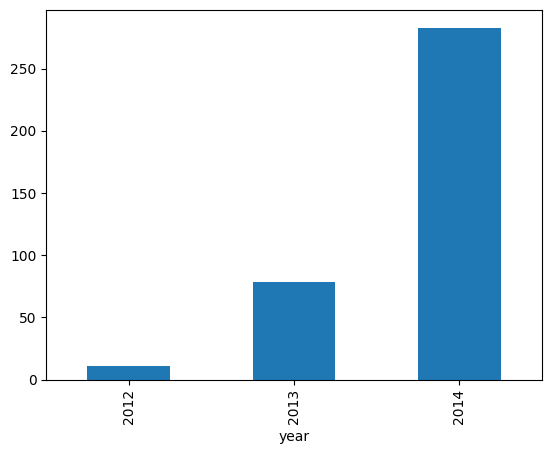

In [ ]:
train.groupby('year')['Count'].mean().plot.bar()

<Axes: xlabel='month'>

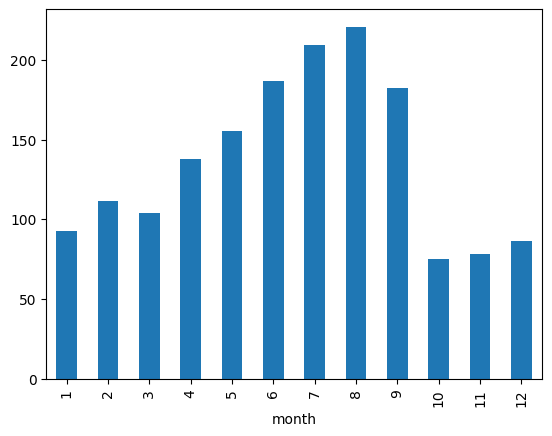

In [ ]:
train.groupby('month')['Count'].mean().plot.bar()

<Axes: title={'center': 'Passenger Count(Monthwise)'}, xlabel='year,month'>

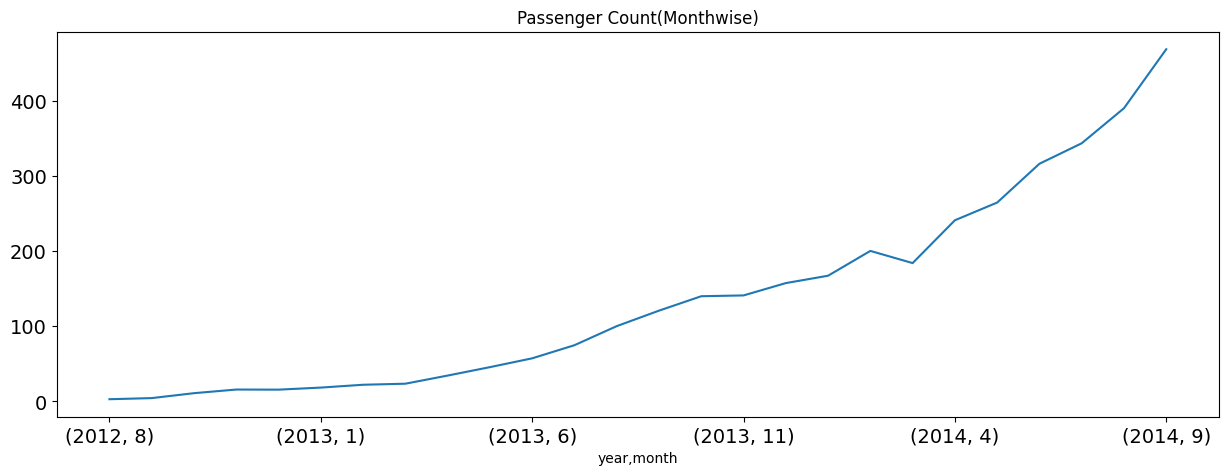

In [ ]:
temp=train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

<Axes: xlabel='day'>

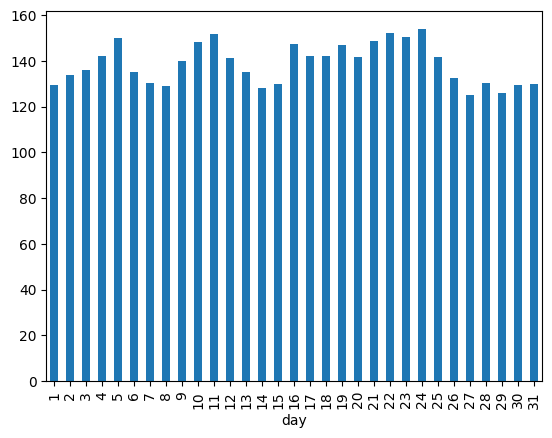

In [ ]:
train.groupby('day')['Count'].mean().plot.bar()

<Axes: xlabel='Hour'>

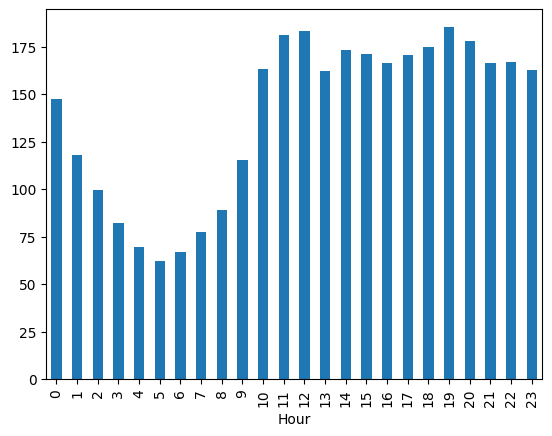

In [ ]:
train.groupby('Hour')['Count'].mean().plot.bar()

<Axes: xlabel='dayofweek'>

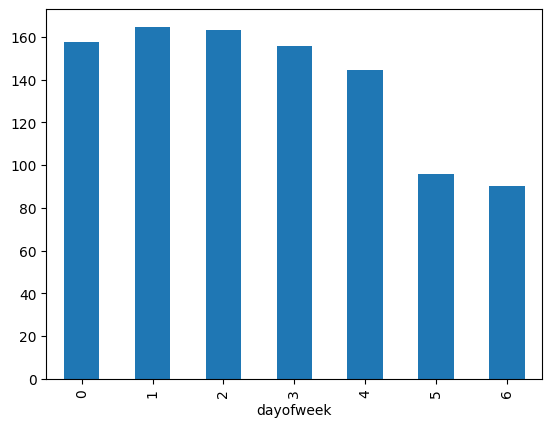

In [ ]:
train.groupby('dayofweek')['Count'].mean().plot.bar()

<Axes: xlabel='weekend'>

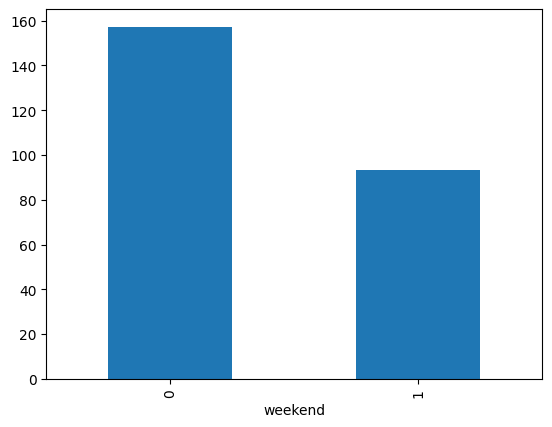

In [ ]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [ ]:
train=train.drop('ID',1)

In [ ]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

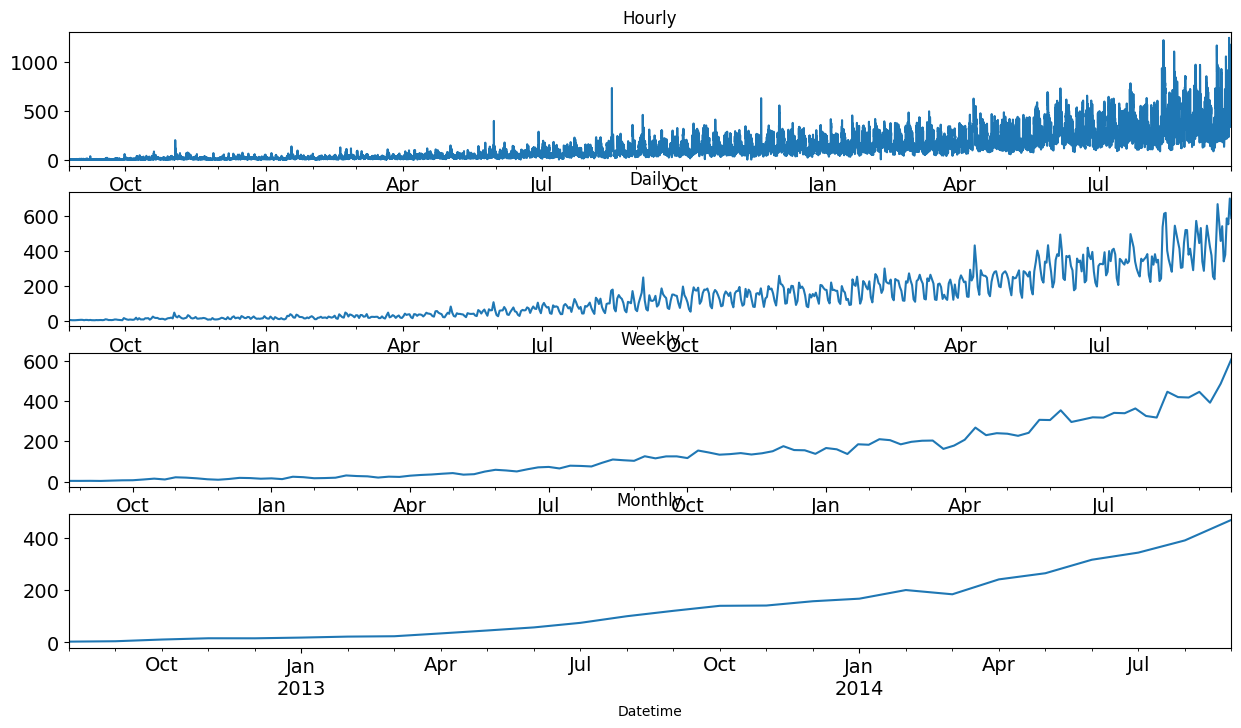

In [ ]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])
plt.show()

In [ ]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()

In [ ]:
Train=train.iloc[:-100]
valid=train.iloc[-100:]

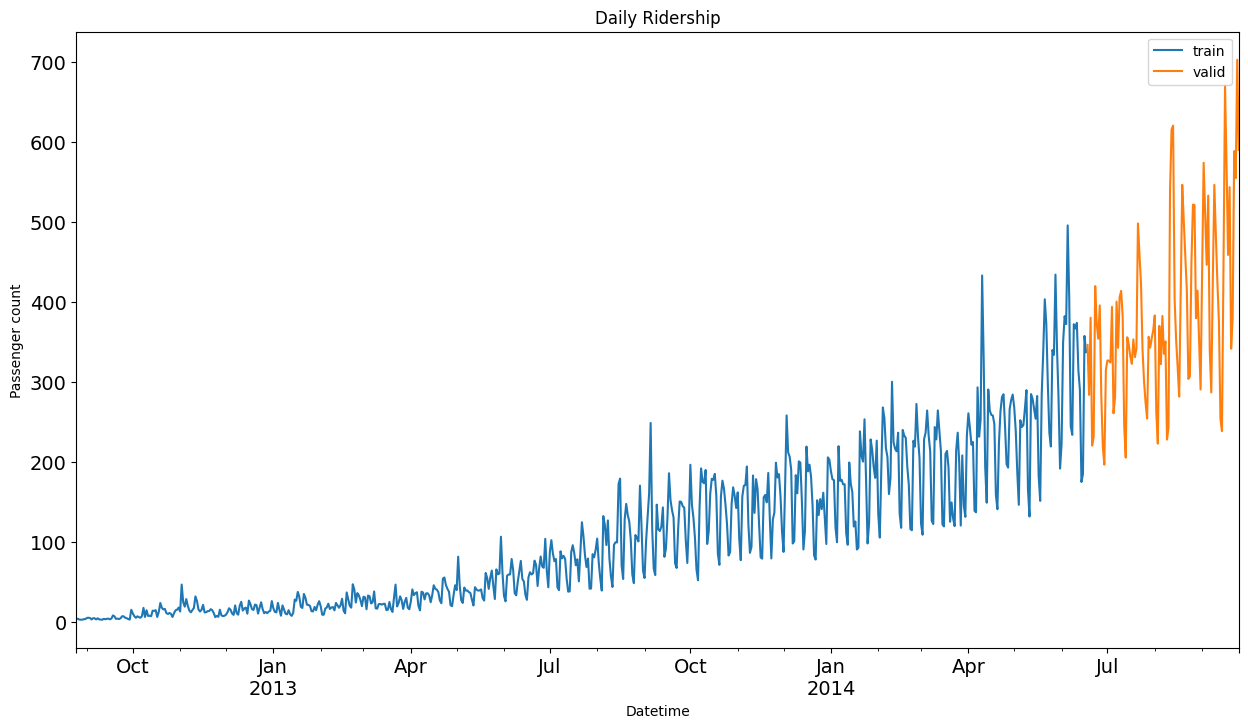

In [ ]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

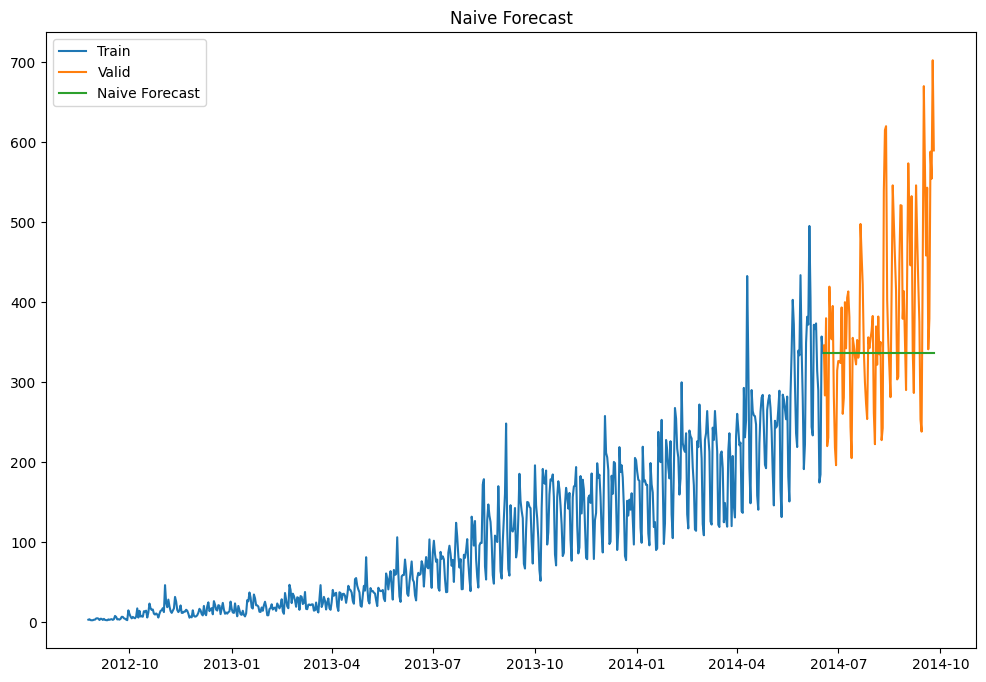

In [ ]:
dd= np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index,valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

119.4922574200242


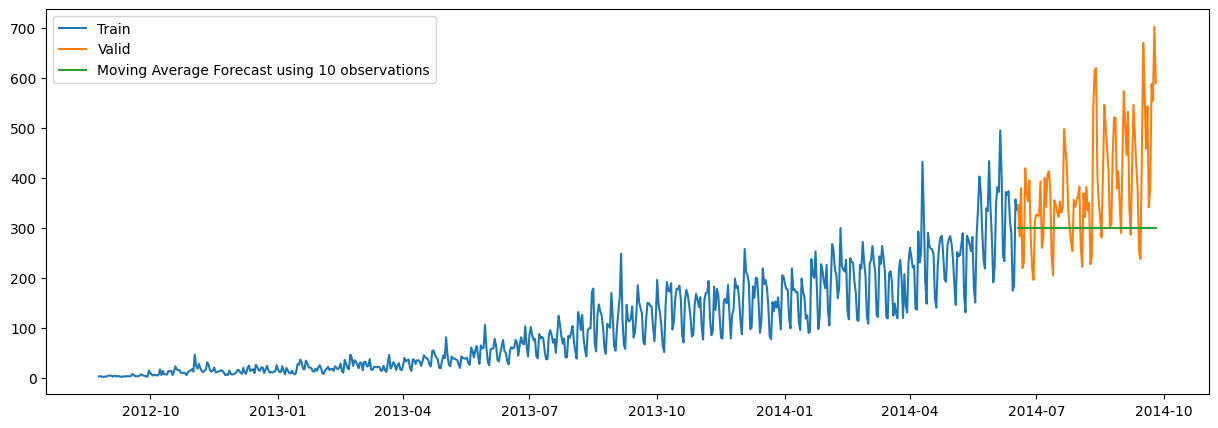

In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],
                label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

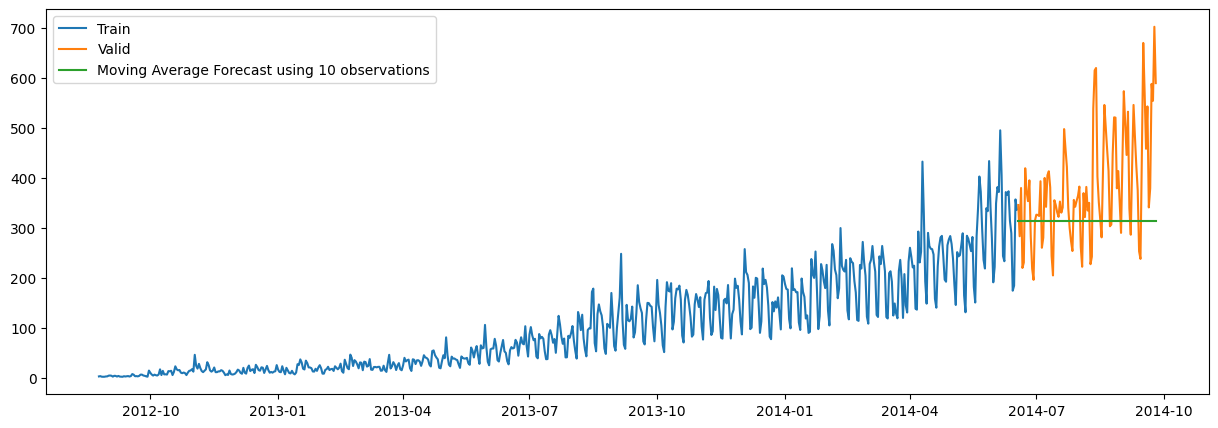

In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],
                label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

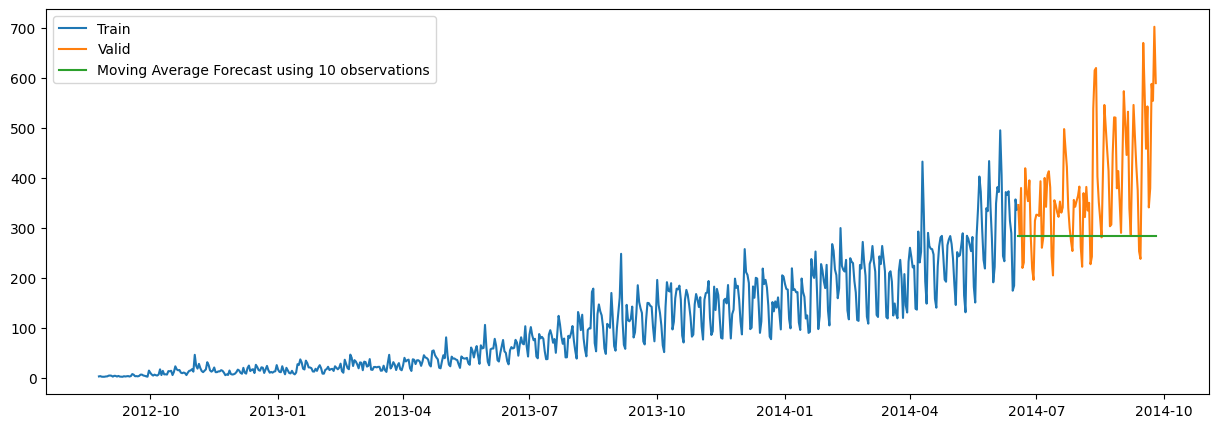

In [ ]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],
                label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

148.30158186389428


In [ ]:
!pip install statsmodels

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

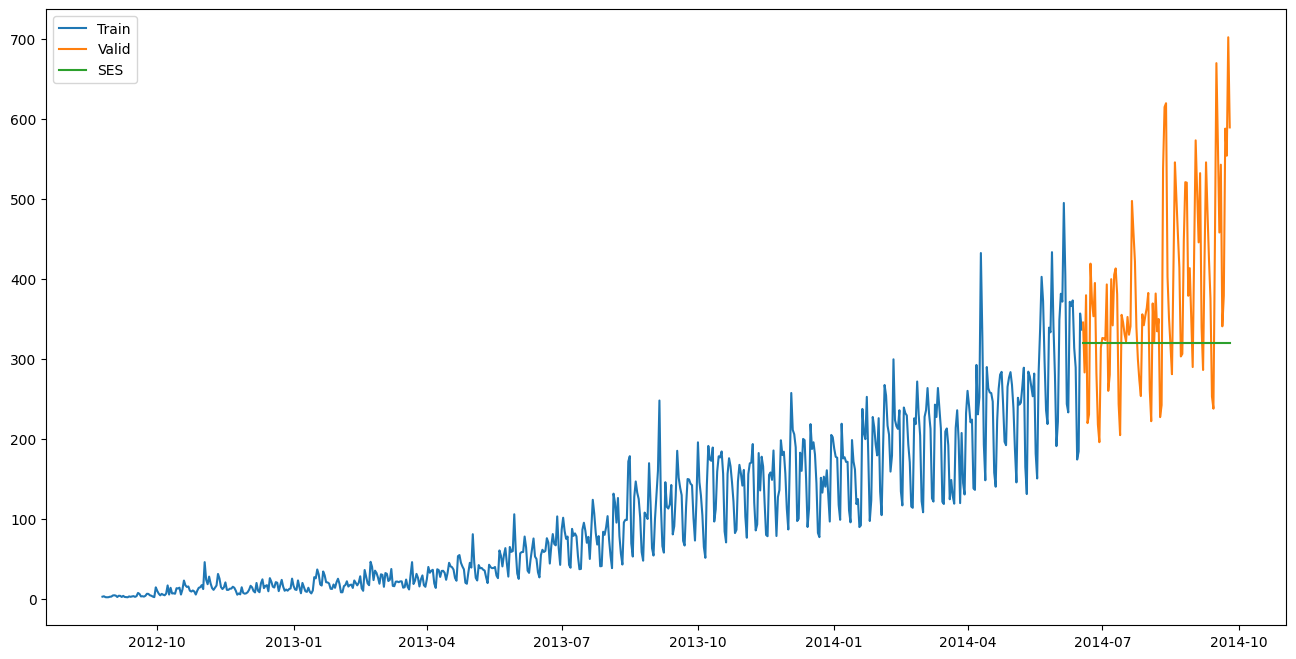

In [ ]:
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

127.10903874208408


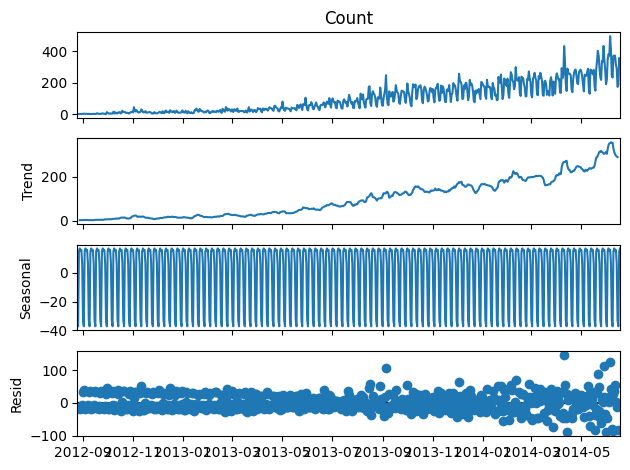

In [ ]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

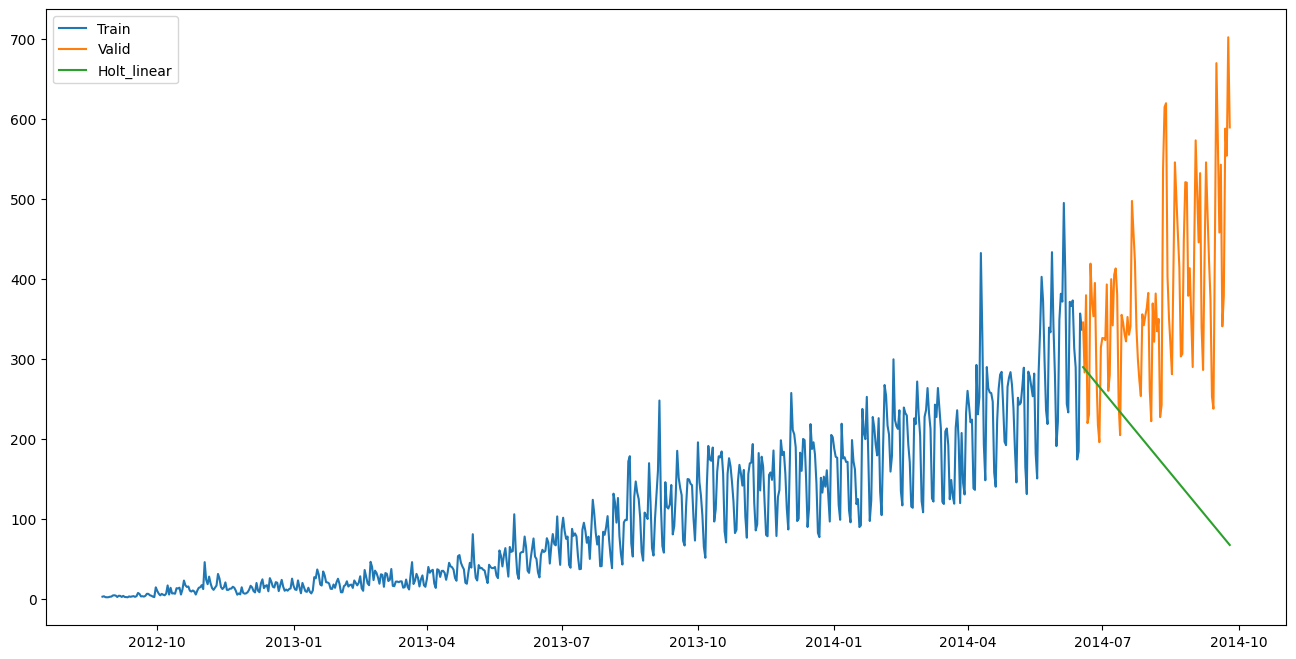

In [ ]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

256.6601413970806


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
history = [x for x in train]
predictions = list()

In [ ]:
history

['Count', 'year', 'month', 'day', 'Hour', 'dayofweek', 'weekend']

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
history

['Count', 'year', 'month', 'day', 'Hour', 'dayofweek', 'weekend']

In [ ]:
test_result=adfuller(train['Count'])

In [ ]:
def adfuller_test(Count):
    result=adfuller(Count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(train['Count'])

weak evidence against null hypothesis,indicating it is non-stationary 
ADF Test Statistic : 2.9863509590138464
p-value : 1.0
#Lags Used : 20
Number of Observations : 741


In [ ]:
from statsmodels.tsa.stattools import adfuller
hypothesis_test=adfuller(train['Count'])
print('ADF Statistic: %f' % hypothesis_test[0])
print('p-value: %f' % hypothesis_test[1])
print('Critical Values:')
for key, value in hypothesis_test[4].items():
 print('\t%s: %.3f' % (key, value))


ADF Statistic: 2.986351
p-value: 1.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [ ]:
import itertools
p=d=q=range(0,5)
pdq =list(itertools.product(p,d,q))

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
AIC={}
for i in pdq:
  try:
    model_arima=ARIMA(train['Count'],order=(i))
    model_fit=model_arima.fit()
    print(model_fit.aic," ",i)
    AIC[model_fit.aic]=i
  except:
      continue

9651.355432317903   (0, 0, 0)
8884.689021384813   (0, 0, 1)
8573.259305527754   (0, 0, 2)
8487.321841023915   (0, 0, 3)
8396.676788202565   (0, 0, 4)
8176.670464120925   (0, 1, 0)
8177.775924700242   (0, 1, 1)
7907.779723220341   (0, 1, 2)
7909.119480281634   (0, 1, 3)
7897.060732008386   (0, 1, 4)
8706.274385909619   (0, 2, 0)
8175.4074570891225   (0, 2, 1)
8176.598482265818   (0, 2, 2)
7875.922735117819   (0, 2, 3)
7876.572387712435   (0, 2, 4)
9442.222003289487   (0, 3, 0)
8704.470848739325   (0, 3, 1)
8180.9763008474565   (0, 3, 2)
8182.314271242998   (0, 3, 3)
7887.559483277703   (0, 3, 4)
10272.326930723379   (0, 4, 0)
9439.217655680048   (0, 4, 1)
8708.562705751112   (0, 4, 2)
8197.859535414009   (0, 4, 3)
8463.791666063724   (0, 4, 4)
8169.505694846528   (1, 0, 0)
8170.6910769398055   (1, 0, 1)
7925.578996650003   (1, 0, 2)
7926.909562392657   (1, 0, 3)
7914.9431487438915   (1, 0, 4)
8178.373202278768   (1, 1, 0)
7989.596479010879   (1, 1, 1)
7909.307280179446   (1, 1, 2)
7910.

In [ ]:
 AIC[min(AIC.keys())]

(1, 4, 3)

In [ ]:
model_arima=ARIMA(train['Count'],order=(1,4,3))
model_fit=model_arima.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Count   No. Observations:                  762
Model:                 ARIMA(1, 4, 3)   Log Likelihood                -559.045
Date:                Thu, 24 Aug 2023   AIC                           1128.090
Time:                        08:31:17   BIC                           1151.243
Sample:                    08-25-2012   HQIC                          1137.007
                         - 09-25-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   4.71e-08   2.12e+07      0.000       1.000       1.000
ma.L1         -3.0000      0.330     -9.096      0.000      -3.646      -2.354
ma.L2          3.0000      0.324      9.271      0.000       2.366       3.634
ma.L3         -1.0000      0.218     -4.590      0.000      -1.427      -0.573
sigma2      3.035e+04   3.97e-05   7.64e+08      0.000    3.03e+04    3.03e+04
===================================================================================
Ljung-Box (L1) (Q):                 246.94   Jarque-Bera (JB):            361044.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -4.00
Prob(H) (two-sided):                  0.00   Kurtosis:                       109.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+24. Standard errors may be unstable.
"""

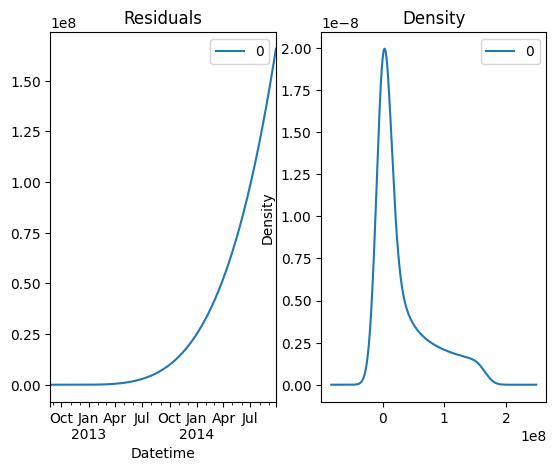

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
trainv1 = train.copy()

In [ ]:
trainv1.drop('year',axis=1, inplace =True)

In [ ]:
trainv1.drop('month',axis=1, inplace =True)
trainv1.drop('day',axis=1, inplace =True)
trainv1.drop('Hour',axis=1, inplace =True)
trainv1.drop('dayofweek',axis=1, inplace =True)

In [ ]:
trainv1.drop('weekend',axis=1, inplace =True)

In [ ]:
trainlog = np.log(trainv1)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Count'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

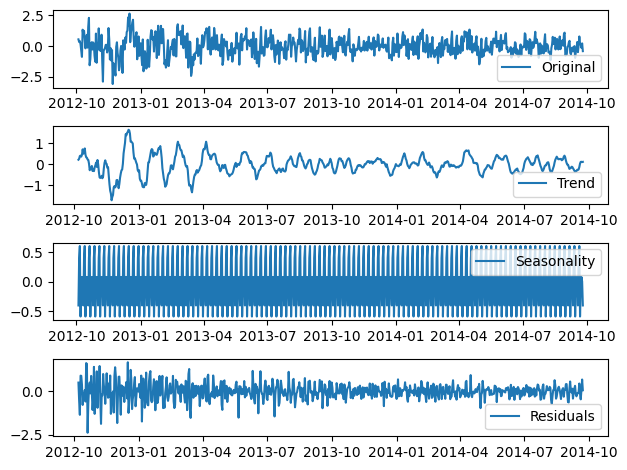

In [ ]:
decomposition = seasonal_decompose(trainlog1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(trainlog, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()


In [ ]:
def adfuller_test(Count):
    result=adfuller(Count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(trainlog)

weak evidence against null hypothesis,indicating it is non-stationary 
ADF Test Statistic : -2.413296168164346
p-value : 0.1380187762362592
#Lags Used : 20
Number of Observations : 741


In [ ]:
trainlog['Count'] = trainlog['Count'] - trainlog['Count'].shift(20)

In [ ]:
trainlog1 = trainlog

In [ ]:
trainlog1 = trainlog1[20:]

In [ ]:
def adfuller_test(Count):
    result=adfuller(Count)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(trainlog1)

weak evidence against null hypothesis,indicating it is non-stationary 
ADF Test Statistic : -9.706716514286642
p-value : 1.0372030786661466e-16
#Lags Used : 20
Number of Observations : 701


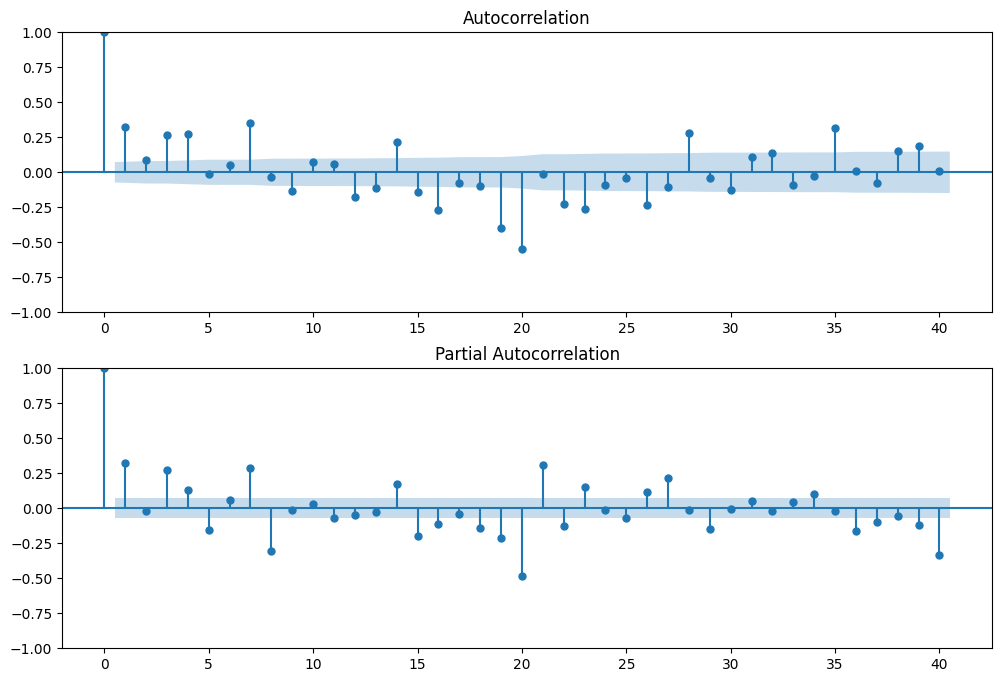

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(trainlog1.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(trainlog1.dropna(),lags=40,ax=ax2)

In [ ]:
X = trainlog1.values
size = int(len(X) * 0.88)
train_f, test_f= X[0:size], X[size:len(X)]
history = [x for x in trainlog1]
predictions = list()


In [ ]:
train_date=trainlog1.index[0:size]
test_date=trainlog1.index[size:len(X)]

In [ ]:
AIC={}
for i in pdq:
  try:
    model_arima=ARIMA(trainlog1,order=(i))
    model_fit=model_arima.fit()
    print(model_fit.aic," ",i)
    AIC[model_fit.aic]=i
  except:
      continue

1012.0170377650254   (0, 0, 0)
887.1259188466533   (0, 0, 1)
888.9226942660284   (0, 0, 2)
887.3596568613094   (0, 0, 3)
861.5209313044998   (0, 0, 4)
1188.607751414765   (0, 1, 0)
962.5667126468388   (0, 1, 1)
888.274734363345   (0, 1, 2)
889.2880959671525   (0, 1, 3)
891.0701051727921   (0, 1, 4)
1864.9534591817487   (0, 2, 0)
1196.6113584916302   (0, 2, 1)
974.1848413382087   (0, 2, 2)
902.9589436675252   (0, 2, 3)
902.6301718093239   (0, 2, 4)
2649.3313022846114   (0, 3, 0)
1872.0427713590911   (0, 3, 1)
1285.5507887934846   (0, 3, 2)
995.4782253213857   (0, 3, 3)
987.2731241412026   (0, 3, 4)
3490.093374483779   (0, 4, 0)
2655.3467379385156   (0, 4, 1)
1885.1235326485112   (0, 4, 2)
1303.449496170186   (0, 4, 3)
1064.433716583335   (0, 4, 4)
909.3346980398044   (1, 0, 0)
888.892296170478   (1, 0, 1)
877.3881425076165   (1, 0, 2)
864.028482310528   (1, 0, 3)
850.2960401606688   (1, 0, 4)
1142.8910821069617   (1, 1, 0)
912.1327407300439   (1, 1, 1)
889.2134876327726   (1, 1, 2)
870.

In [ ]:
AIC[min(AIC.keys())]

(1, 4, 3)

In [ ]:
model_arima=ARIMA(train_f,order=(4,1,4))
model_fit=model_arima.fit()

In [ ]:
history = [x for x in train_f]

In [ ]:
predictions=[]
# walk-forward validation
for t in range(len(test_f)):
  model = ARIMA(history, order=(4,1,4))
  model.initialize_approximate_diffuse()
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test_f[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecast

predicted=-0.307614, expected=-0.137170
predicted=-0.094080, expected=-0.018401
predicted=0.280924, expected=-0.091862
predicted=-0.252748, expected=1.038756
predicted=0.296711, expected=0.952407
predicted=0.610691, expected=-0.309472
predicted=-0.135356, expected=0.424262
predicted=0.107797, expected=-0.022293
predicted=0.042684, expected=0.346074
predicted=0.407139, expected=-0.601431
predicted=-0.567249, expected=0.557902
predicted=0.441208, expected=0.469667
predicted=0.299426, expected=-0.809547
predicted=-0.391209, expected=-0.046723
predicted=-0.185612, expected=0.314551
predicted=0.537483, expected=-0.150494
predicted=-0.308360, expected=-0.013681
predicted=0.040881, expected=0.547659
predicted=0.283342, expected=1.160302
predicted=0.759147, expected=0.233458
predicted=-0.364161, expected=0.555933
predicted=0.362913, expected=0.304305
predicted=0.210396, expected=0.152673
predicted=0.143846, expected=-0.958881
predicted=-0.822877, expected=-0.203343
predicted=0.545398, expected

Test RMSE: 0.553


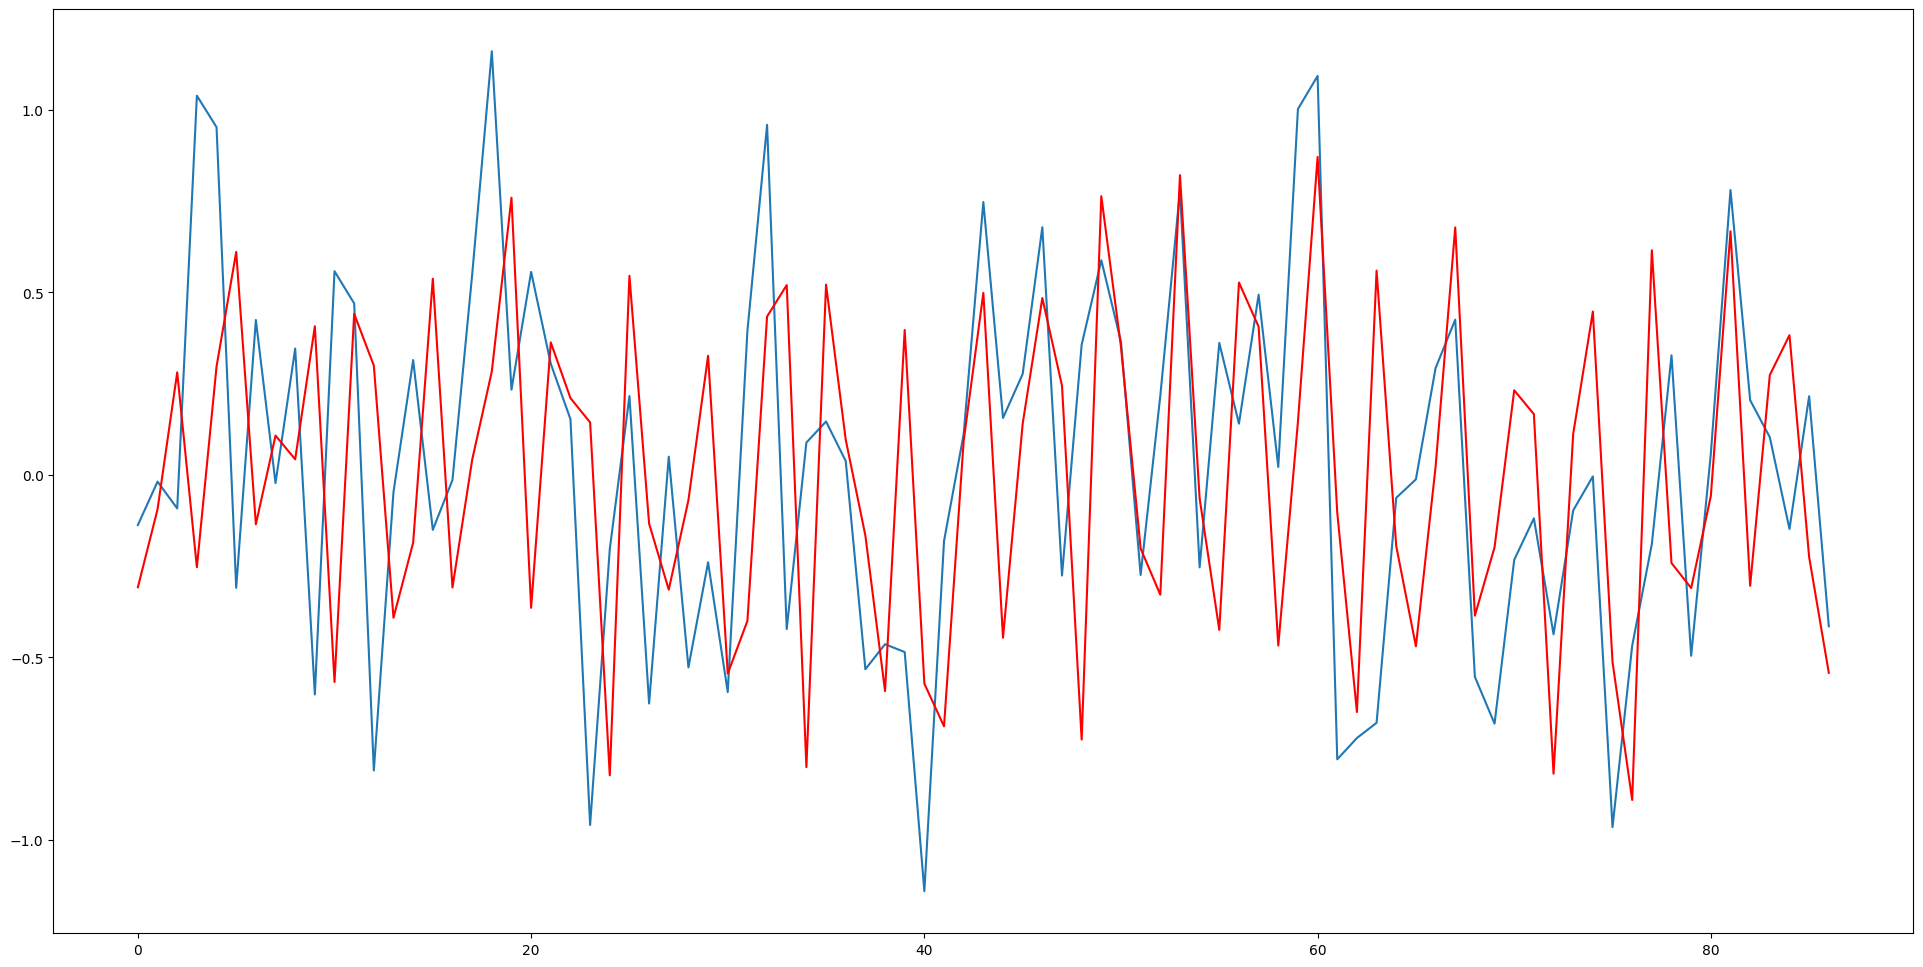

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_f, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.figure(figsize=(24,12))
plt.plot(test_f)
plt.plot(predictions, color='red')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(test_f.reshape(-1),predictions))

Mean Absolute Error: 0.4504882531267051
